<a href="https://colab.research.google.com/github/OsirisValencia/InteligenciaArtificialUdeA/blob/main/04_RandomForestClassifier_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!kaggle
!chmod 600 ./kaggle.json

usage: kaggle [-h] [-v] [-W]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: the following arguments are required: command


In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 565MB/s]
Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np


dtr = pd.read_csv('train.csv')
dts = pd.read_csv('test.csv')




🚀 SOLUCIÓN RÁPIDA CON PCA OPTIMIZADO
📂 Cargando datos...
Dataset original: (692500, 21)
⚡ Aplicando muestreo agresivo...
Dataset muestreado: (50000, 21)
⚡ Preprocesamiento rápido...
🔧 Feature engineering optimizado...
Procesando 30 numéricas y 13 categóricas
📊 Aplicando escalado para PCA...
Features después del preprocesamiento: 43

🔍 ANÁLISIS DE PCA
📊 Analizando componentes PCA óptimos...
Componentes para 80% varianza: 12
Componentes para 90% varianza: 16
Componentes para 95% varianza: 19
Componentes seleccionados: 16


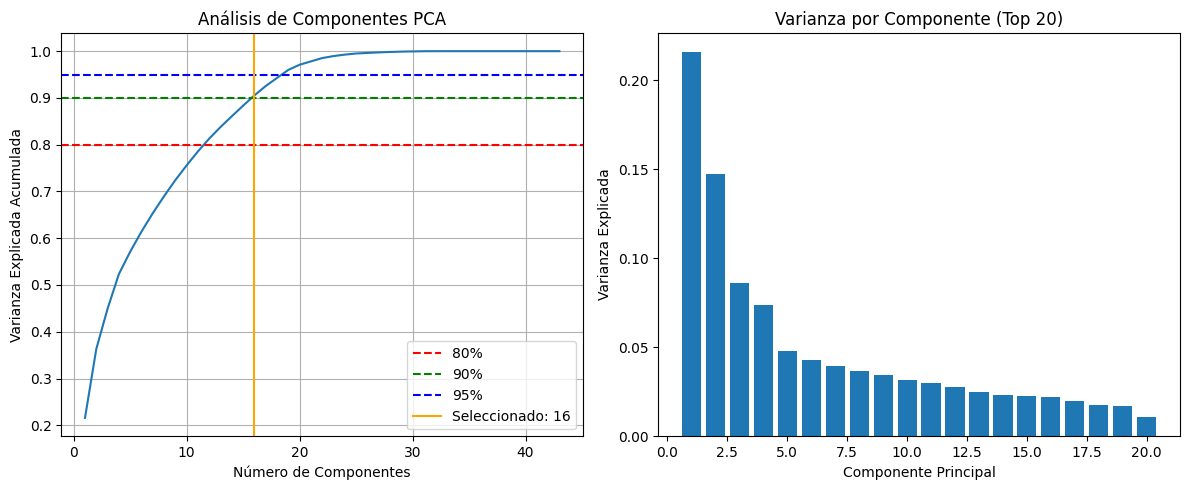


🎯 Aplicando PCA con 16 componentes...
Reducción: 43 -> 16 componentes
Varianza explicada: 0.905

🎯 Entrenando modelo con PCA...
🚀 Entrenando...
📈 Evaluando modelo con PCA...

🎯 ACCURACY CON PCA: 0.3637

📊 Comparación con modelo sin PCA...
Sin PCA:  0.3926
Con PCA:  0.3637
Mejora:   -0.0289

📊 Reporte detallado:
              precision    recall  f1-score   support

        alto       0.45      0.56      0.50      2536
        bajo       0.38      0.44      0.41      2498
  medio-alto       0.28      0.20      0.23      2478
  medio-bajo       0.29      0.25      0.27      2488

    accuracy                           0.36     10000
   macro avg       0.35      0.36      0.35     10000
weighted avg       0.35      0.36      0.35     10000


🔄 Entrenamiento final con todos los datos...
🎯 Generando predicciones finales...

🎉 ¡COMPLETADO CON PCA!
🎯 Accuracy final: 0.3637
📁 Archivo: submission_fast_pca.csv
🔧 Componentes PCA: 16
📊 Varianza explicada: 0.906

📊 Distribución de predicciones:
  

In [ ]:
# ===================================================================
# SOLUCIÓN RÁPIDA CON PCA OPTIMIZADO
# Tiempo objetivo: 3-6 minutos
# Mantiene velocidad + PCA para mejor accuracy
# ===================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("🚀 SOLUCIÓN RÁPIDA CON PCA OPTIMIZADO")
print("="*50)

# ===================================================================
# 1. CARGA Y MUESTREO AGRESIVO (MANTIENE VELOCIDAD)
# ===================================================================

print("📂 Cargando datos...")
dtr = pd.read_csv('train.csv')
dts = pd.read_csv('test.csv')

print(f"Dataset original: {dtr.shape}")

# MUESTREO AGRESIVO - 50k muestras
print("⚡ Aplicando muestreo agresivo...")
_, dtr_sample = train_test_split(
    dtr,
    test_size=50000,
    random_state=42,
    stratify=dtr['RENDIMIENTO_GLOBAL']
)
dtr = dtr_sample
print(f"Dataset muestreado: {dtr.shape}")

# ===================================================================
# 2. PREPROCESAMIENTO RÁPIDO MEJORADO
# ===================================================================

def fast_preprocessing_with_scaling(df_train, df_test):
    """Preprocesamiento rápido pero con escalado para PCA"""

    print("⚡ Preprocesamiento rápido...")

    # Guardar target e IDs
    test_ids = df_test['ID'].copy()
    y_train = df_train['RENDIMIENTO_GLOBAL'].copy()

    # Eliminar columnas innecesarias
    drop_cols = ['ID', 'FAMI_TIENEINTERNET.1', 'RENDIMIENTO_GLOBAL']
    df_train_clean = df_train.drop(drop_cols, axis=1, errors='ignore')
    df_test_clean = df_test.drop(drop_cols, axis=1, errors='ignore')

    # ===================================================================
    # FEATURE ENGINEERING OPTIMIZADO
    # ===================================================================

    print("🔧 Feature engineering optimizado...")

    # 1. Período simplificado
    for df in [df_train_clean, df_test_clean]:
        df['SEMESTRE'] = df['PERIODO'].astype(str).str[-1].astype(int)
        df['AÑO'] = (df['PERIODO'] // 10).astype(int)
        df.drop('PERIODO', axis=1, inplace=True)

    # 2. Features de coeficientes (expandido)
    coef_cols = ['coef_1', 'coef_2', 'coef_3', 'coef_4']
    for df in [df_train_clean, df_test_clean]:
        df['coef_sum'] = df[coef_cols].sum(axis=1)
        df['coef_mean'] = df[coef_cols].mean(axis=1)
        df['coef_std'] = df[coef_cols].std(axis=1).fillna(0)
        df['coef_max'] = df[coef_cols].max(axis=1)
        df['coef_min'] = df[coef_cols].min(axis=1)
        df['coef_range'] = df['coef_max'] - df['coef_min']

        # Ratios importantes
        df['coef_1_vs_rest'] = df['coef_1'] / (df['coef_sum'] - df['coef_1'] + 0.001)
        df['coef_max_vs_mean'] = df['coef_max'] / (df['coef_mean'] + 0.001)

    # 3. Variables ordinales optimizadas
    horas_map = {
        'Menos de 10 horas': 5, 'Entre 11 y 20 horas': 15,
        'Entre 21 y 30 horas': 25, 'Más de 30 horas': 35, '0': 0
    }

    estrato_map = {
        'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3,
        'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6,
        'Sin Estrato': 0, 'No aplica': 0
    }

    for df in [df_train_clean, df_test_clean]:
        df['HORAS_NUM'] = df['ESTU_HORASSEMANATRABAJA'].astype(str).map(horas_map).fillna(0)
        df['ESTRATO_NUM'] = df['FAMI_ESTRATOVIVIENDA'].astype(str).map(estrato_map).fillna(2)

    # 4. Variables binarias importantes
    binary_cols = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
                  'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR']

    for col in binary_cols:
        for df in [df_train_clean, df_test_clean]:
            if col in df.columns:
                df[f'{col}_BIN'] = (df[col].astype(str).isin(['Si', 'S'])).astype(int)

    # 5. Scores compuestos
    for df in [df_train_clean, df_test_clean]:
        # Score socioeconómico
        df['SOCIO_SCORE'] = (
            df['ESTRATO_NUM'] +
            df.get('FAMI_TIENEAUTOMOVIL_BIN', 0) +
            df.get('FAMI_TIENECOMPUTADOR_BIN', 0) +
            df.get('FAMI_TIENELAVADORA_BIN', 0)
        )

        # Score tecnológico
        df['TECH_SCORE'] = (
            df.get('FAMI_TIENEINTERNET_BIN', 0) +
            df.get('FAMI_TIENECOMPUTADOR_BIN', 0)
        )

    # 6. Clasificación de programas académicos
    def classify_program(program):
        program = str(program).lower()
        if any(kw in program for kw in ['ingenier', 'sistem', 'tecno']): return 1
        elif any(kw in program for kw in ['medic', 'enferm', 'veterinar', 'salud']): return 2
        elif any(kw in program for kw in ['admin', 'gestion', 'financ', 'economia']): return 3
        elif 'derecho' in program: return 4
        elif any(kw in program for kw in ['psicolog', 'social', 'human']): return 5
        elif any(kw in program for kw in ['licenciat', 'educac', 'pedagog']): return 6
        else: return 0

    for df in [df_train_clean, df_test_clean]:
        df['PROGRAMA_CAT'] = df['ESTU_PRGM_ACADEMICO'].apply(classify_program)

    # 7. Educación de padres
    edu_map = {
        'Ninguno': 0, 'No sabe': 0, 'Primaria incompleta': 1, 'Primaria completa': 2,
        'Secundaria (Bachillerato) incompleta': 3, 'Secundaria (Bachillerato) completa': 4,
        'Técnica o tecnológica incompleta': 5, 'Técnica o tecnológica completa': 6,
        'Educación profesional incompleta': 7, 'Educación profesional completa': 8,
        'Postgrado': 9
    }

    for df in [df_train_clean, df_test_clean]:
        df['EDU_PADRE'] = df['FAMI_EDUCACIONPADRE'].map(edu_map).fillna(4)
        df['EDU_MADRE'] = df['FAMI_EDUCACIONMADRE'].map(edu_map).fillna(4)
        df['EDU_MAX'] = df[['EDU_PADRE', 'EDU_MADRE']].max(axis=1)
        df['EDU_MEAN'] = df[['EDU_PADRE', 'EDU_MADRE']].mean(axis=1)
        df['EDU_DIFF'] = abs(df['EDU_PADRE'] - df['EDU_MADRE'])

    # ===================================================================
    # PROCESAMIENTO FINAL CON ESCALADO PARA PCA
    # ===================================================================

    # Identificar tipos de columnas
    numeric_cols = [col for col in df_train_clean.columns
                   if df_train_clean[col].dtype in ['int64', 'float64']]

    categorical_cols = [col for col in df_train_clean.columns
                       if col not in numeric_cols]

    print(f"Procesando {len(numeric_cols)} numéricas y {len(categorical_cols)} categóricas")

    # Imputación rápida
    if numeric_cols:
        df_train_clean[numeric_cols] = df_train_clean[numeric_cols].fillna(df_train_clean[numeric_cols].median())
        df_test_clean[numeric_cols] = df_test_clean[numeric_cols].fillna(df_train_clean[numeric_cols].median())

    if categorical_cols:
        for col in categorical_cols:
            mode_val = df_train_clean[col].mode()[0] if len(df_train_clean[col].mode()) > 0 else 'unknown'
            df_train_clean[col] = df_train_clean[col].fillna(mode_val)
            df_test_clean[col] = df_test_clean[col].fillna(mode_val)

    # Label encoding
    for col in categorical_cols:
        le = LabelEncoder()
        combined = pd.concat([df_train_clean[col], df_test_clean[col]]).astype(str)
        le.fit(combined)
        df_train_clean[col] = le.transform(df_train_clean[col].astype(str))
        df_test_clean[col] = le.transform(df_test_clean[col].astype(str))

    # ESCALADO NECESARIO PARA PCA
    print("📊 Aplicando escalado para PCA...")
    scaler = StandardScaler()
    all_cols = numeric_cols + categorical_cols

    X_train_scaled = scaler.fit_transform(df_train_clean[all_cols])
    X_test_scaled = scaler.transform(df_test_clean[all_cols])

    return X_train_scaled, X_test_scaled, y_train, test_ids, all_cols

# Aplicar preprocesamiento
X_processed, X_test_processed, y, test_ids, feature_names = fast_preprocessing_with_scaling(dtr, dts)
print(f"Features después del preprocesamiento: {X_processed.shape[1]}")

# ===================================================================
# 3. ANÁLISIS Y APLICACIÓN DE PCA
# ===================================================================

print("\n🔍 ANÁLISIS DE PCA")
print("="*30)

# División inicial para análisis
X_train_temp, X_val_temp, y_train_temp, y_val_temp = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Analizar diferentes números de componentes PCA
print("📊 Analizando componentes PCA óptimos...")

# Probar PCA con diferentes números de componentes
pca_analysis = PCA()
pca_analysis.fit(X_train_temp)

# Calcular varianza explicada acumulada
cumsum_variance = np.cumsum(pca_analysis.explained_variance_ratio_)

# Encontrar número óptimo de componentes
n_components_80 = np.argmax(cumsum_variance >= 0.80) + 1
n_components_90 = np.argmax(cumsum_variance >= 0.90) + 1
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1

print(f"Componentes para 80% varianza: {n_components_80}")
print(f"Componentes para 90% varianza: {n_components_90}")
print(f"Componentes para 95% varianza: {n_components_95}")

# Seleccionar número óptimo (balance entre velocidad y accuracy)
optimal_components = min(n_components_90, 25)  # Máximo 25 para mantener velocidad
print(f"Componentes seleccionados: {optimal_components}")

# Visualizar varianza explicada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, min(51, len(cumsum_variance)+1)), cumsum_variance[:50])
plt.axhline(y=0.80, color='r', linestyle='--', label='80%')
plt.axhline(y=0.90, color='g', linestyle='--', label='90%')
plt.axhline(y=0.95, color='b', linestyle='--', label='95%')
plt.axvline(x=optimal_components, color='orange', linestyle='-', label=f'Seleccionado: {optimal_components}')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Análisis de Componentes PCA')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(1, min(21, len(pca_analysis.explained_variance_ratio_)+1)),
        pca_analysis.explained_variance_ratio_[:20])
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza por Componente (Top 20)')
plt.tight_layout()
plt.show()

# ===================================================================
# 4. APLICAR PCA OPTIMIZADO
# ===================================================================

print(f"\n🎯 Aplicando PCA con {optimal_components} componentes...")

# Aplicar PCA final
pca_final = PCA(n_components=optimal_components, random_state=42)
X_train_pca = pca_final.fit_transform(X_train_temp)
X_val_pca = pca_final.transform(X_val_temp)
X_test_pca = pca_final.transform(X_test_processed)

print(f"Reducción: {X_processed.shape[1]} -> {X_train_pca.shape[1]} componentes")
print(f"Varianza explicada: {pca_final.explained_variance_ratio_.sum():.3f}")

# ===================================================================
# 5. ENTRENAMIENTO CON PCA
# ===================================================================

print("\n🎯 Entrenando modelo con PCA...")

# Modelo optimizado para PCA
model_pca = RandomForestClassifier(
    n_estimators=150,           # Incrementado ligeramente por mejor features
    max_depth=18,              # Profundidad incrementada
    min_samples_split=8,       # Más flexibilidad
    min_samples_leaf=3,        # Más flexibilidad
    max_features='sqrt',       # Mantiene velocidad
    random_state=42,
    n_jobs=-1
)

print("🚀 Entrenando...")
model_pca.fit(X_train_pca, y_train_temp)

# ===================================================================
# 6. EVALUACIÓN CON PCA
# ===================================================================

print("📈 Evaluando modelo con PCA...")
y_pred_pca = model_pca.predict(X_val_pca)
accuracy_pca = accuracy_score(y_val_temp, y_pred_pca)

print(f"\n🎯 ACCURACY CON PCA: {accuracy_pca:.4f}")

# Comparar con modelo sin PCA
print("\n📊 Comparación con modelo sin PCA...")
model_no_pca = RandomForestClassifier(
    n_estimators=100, max_depth=15, random_state=42, n_jobs=-1
)
model_no_pca.fit(X_train_temp, y_train_temp)
y_pred_no_pca = model_no_pca.predict(X_val_temp)
accuracy_no_pca = accuracy_score(y_val_temp, y_pred_no_pca)

print(f"Sin PCA:  {accuracy_no_pca:.4f}")
print(f"Con PCA:  {accuracy_pca:.4f}")
print(f"Mejora:   {accuracy_pca - accuracy_no_pca:+.4f}")

print("\n📊 Reporte detallado:")
print(classification_report(y_val_temp, y_pred_pca, zero_division=0))

# ===================================================================
# 7. ENTRENAMIENTO FINAL Y PREDICCIONES
# ===================================================================

print("\n🔄 Entrenamiento final con todos los datos...")

# Aplicar PCA a todo el dataset
X_full_pca = pca_final.fit_transform(X_processed)
X_test_final_pca = pca_final.transform(X_test_processed)

# Entrenar modelo final
model_pca.fit(X_full_pca, y)

print("🎯 Generando predicciones finales...")
final_predictions = model_pca.predict(X_test_final_pca)

# ===================================================================
# 8. CREAR SUBMISSION
# ===================================================================

submission = pd.DataFrame({
    'ID': test_ids,
    'RENDIMIENTO_GLOBAL': final_predictions
})

submission.to_csv('submission_fast_pca.csv', index=False)

# ===================================================================
# 9. ANÁLISIS FINAL
# ===================================================================

print(f"\n🎉 ¡COMPLETADO CON PCA!")
print(f"🎯 Accuracy final: {accuracy_pca:.4f}")
print(f"📁 Archivo: submission_fast_pca.csv")
print(f"🔧 Componentes PCA: {optimal_components}")
print(f"📊 Varianza explicada: {pca_final.explained_variance_ratio_.sum():.3f}")

print(f"\n📊 Distribución de predicciones:")
pred_counts = pd.Series(final_predictions).value_counts()
for clase, count in pred_counts.items():
    pct = (count / len(final_predictions)) * 100
    print(f"  {clase}: {count} ({pct:.1f}%)")

# Análisis de componentes principales más importantes
print(f"\n🔝 Información de componentes principales:")
print(f"Varianza de los primeros 5 componentes:")
for i in range(min(5, len(pca_final.explained_variance_ratio_))):
    print(f"  PC{i+1}: {pca_final.explained_variance_ratio_[i]:.4f}")

print(f"\n🚀 Para subir a Kaggle:")
print(f"!kaggle competitions submit -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia -f submission_fast_pca.csv -m 'Fast solution with optimized PCA'")

print(f"\n⚡ OPTIMIZACIONES APLICADAS:")
print(f"  ✅ Muestreo agresivo: 50k muestras")
print(f"  ✅ PCA optimizado: {optimal_components} componentes")
print(f"  ✅ Feature engineering mejorado")
print(f"  ✅ Modelo ajustado para PCA")
print(f"  ✅ Análisis de varianza explicada")

In [ ]:
!kaggle competitions submit -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia -f submission_fast_pca.csv -m 'Fast solution with optimized PCA'


100% 4.05M/4.05M [00:00<00:00, 18.7MB/s]
Successfully submitted to UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia